<a href="https://colab.research.google.com/github/Tushar-Lingwal/Tushar-Lingwal/blob/main/Intern__hIre_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Load the dataset
data_excel = pd.read_excel("/content/Applications_for_Machine_Learning_internship_edited.xlsx")  # Replace "dataset.csv" with the actual path to your dataset file



In [ ]:
data_excel.describe()


,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Current Year Of Graduation
count,0.0,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,NaN,1.792254,1.300176,0.497359,0.662852,1994.375000
std,NaN,0.917270,1.016446,0.861303,0.938587,238.489554
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,2023.000000
50%,NaN,2.000000,2.000000,0.000000,0.000000,2023.000000
75%,NaN,2.000000,2.000000,1.000000,1.000000,2024.000000
max,NaN,3.000000,3.000000,3.000000,3.000000,2027.000000


In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 14 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Name                                                                                               0 non-null      float64
 1   Python (out of 3)                                                                                  1136 non-null   int64  
 2   Machine Learning (out of 3)                                                                        1136 non-null   int64  
 3   Natural Language Processing (NLP) (out of 3)                                                       1136 non-null   int64  
 4   Deep Learning (out of 3)                                                                           1136 non-null   int64

PERFROMING  EDA (exploratory data analysis)

In [ ]:
data_excel.shape


(1136, 14)

In [ ]:
data = data_excel[["Python (out of 3)", "Machine Learning (out of 3)", "Natural Language Processing (NLP) (out of 3)", "Deep Learning (out of 3)", "Other skills" ,   "Degree", "Current Year Of Graduation"]]

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Python (out of 3)                             1136 non-null   int64 
 1   Machine Learning (out of 3)                   1136 non-null   int64 
 2   Natural Language Processing (NLP) (out of 3)  1136 non-null   int64 
 3   Deep Learning (out of 3)                      1136 non-null   int64 
 4   Other skills                                  1070 non-null   object
 5   Degree                                        1093 non-null   object
 6   Current Year Of Graduation                    1136 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 62.2+ KB


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

<ipython-input-7-56ea5d4c48fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Python (out of 3)                               0
Machine Learning (out of 3)                     0
Natural Language Processing (NLP) (out of 3)    0
Deep Learning (out of 3)                        0
Other skills                                    0
Degree                                          0
Current Year Of Graduation                      0
dtype: int64

In [ ]:
data.describe()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Current Year Of Graduation
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,1.915616,1.387003,0.532493,0.706111,2022.872939
std,0.821825,0.991510,0.880568,0.951214,2.366915
min,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,2.000000,0.000000,0.000000,0.000000,2023.000000
50%,2.000000,2.000000,0.000000,0.000000,2023.000000
75%,2.000000,2.000000,1.000000,2.000000,2024.000000
max,3.000000,3.000000,3.000000,3.000000,2027.000000


In [ ]:
data['Degree'].value_counts()

B.Tech                                             408
Bachelor of Technology (B.Tech)                    116
Bachelor of Engineering (B.E)                      115
Bachelor of Science (B.Sc)                          48
Master of Science (M.Sc)                            41
                                                  ... 
Integrated M.Tech                                    1
B.Ed Special Education                               1
Bachelors of Data Science                            1
B.tech Artificial Intelligence And Data Science      1
Post Graduation Diploma                              1
Name: Degree, Length: 86, dtype: int64

In [ ]:
data.rename(columns = {'Python (out of 3)':'python', 'Machine Learning (out of 3)' : 'ML',
                       'Natural Language Processing (NLP) (out of 3)':'NLP', 'Deep Learning (out of 3)':'DL'
                       , 'Current Year Of Graduation': 'GYear'}, inplace = True)

<ipython-input-10-3a04c9d807db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'Python (out of 3)':'python', 'Machine Learning (out of 3)' : 'ML',


In [ ]:
data['python'].value_counts()
data['ML'].value_counts()

2    465
0    278
1    182
3    106
Name: ML, dtype: int64

In [ ]:
def candidate_class(Python, ML, NLP , DL):
  if Python > 0 and ML > 0:
    if NLP > 0 and DL > 0:
      return 2
    if NLP > 0 or DL > 0:
      return 3
    else:
      return 1
  else:
    return 0

candidate_score = {1: 1,
                   2: 2,
                   3: 3}

candidate = map(candidate_class, data['python'], data['ML'], data['NLP'], data['DL'])
result = list(candidate)
print(result)
data['candidate_score'] = result

[0, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 3, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 3, 2, 0, 3, 3, 1, 1, 2, 2, 2, 3, 0, 2, 2, 2, 3, 0, 1, 3, 3, 1, 0, 1, 2, 1, 1, 1, 3, 3, 1, 3, 0, 1, 3, 1, 0, 0, 3, 0, 1, 0, 0, 2, 2, 0, 3, 0, 1, 2, 1, 1, 3, 1, 1, 3, 1, 0, 3, 1, 3, 0, 1, 2, 3, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 3, 3, 2, 2, 0, 1, 0, 0, 0, 3, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 3, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 1, 3, 1, 1, 2, 1, 2, 2, 3, 0, 0, 3, 1, 2, 3, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 3, 2, 0, 0, 1, 2, 0, 3, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 3, 1, 1, 3, 1, 1, 1, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 2, 1, 3, 2, 3, 0, 1, 0, 2, 0, 0, 2, 1, 0, 3, 3, 2, 2, 1, 3, 2, 0, 1, 0, 3, 2, 0, 0, 1, 0, 1, 3, 2, 0, 0, 2, 0, 3, 0, 1, 2, 2, 3, 2, 1, 1, 1, 3, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 3, 2, 3, 0, 1, 0, 0, 0, 3, 3, 2, 1, 0, 0, 0, 0, 2, 0, 3, 2, 2, 0, 3, 0, 3, 3, 3, 2, 3, 1, 0, 1, 3, 3, 1, 1, 3, 0, 1, 3, 0, 0, 1, 1, 0, 0, 3, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 3, 3, 0, 0, 0, 1, 

<ipython-input-12-337544ef582c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['candidate_score'] = result


In [ ]:
data.head()


,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",Bachelor of Vocation (B.Voc.),2021,0
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",B.Tech,2024,0
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",Master of Science (M.S.),2022,1
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",Bachelor of Engineering (B.E),2024,3
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",B.Tech,2023,1


### **now that i have describe the candidate score i can exclude the first 4 columns as their value  is now represented by candidate_score column**

In [ ]:
data['Degree'].nunique()

86

<ipython-input-15-573f407d7f19>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-15-573f407d7f19>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


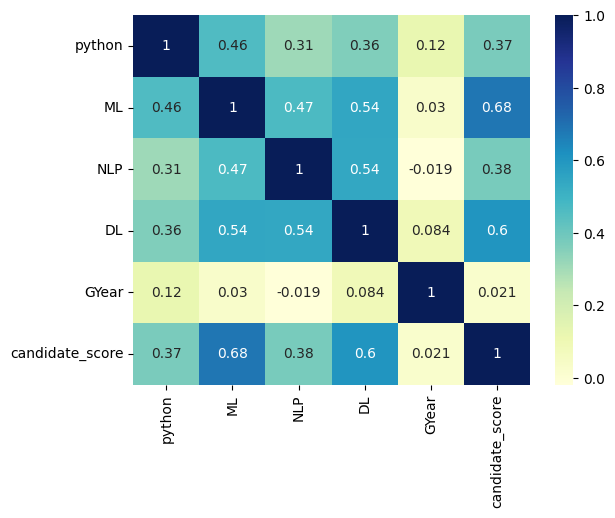

In [ ]:
import seaborn as sb

data.corr()
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
data = data.join(data_excel['Are you available for 3 months, starting immediately, for a full-time work from home internship? '])

In [ ]:
data.head()

,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score,"Are you available for 3 months, starting immediately, for a full-time work from home internship?"
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",Bachelor of Vocation (B.Voc.),2021,0,"Yes, I am available for 3 months starting imme..."
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",B.Tech,2024,0,"Yes, I am available for 3 months starting imme..."
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",Master of Science (M.S.),2022,1,"Yes, I am available for 3 months starting imme..."
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",Bachelor of Engineering (B.E),2024,3,"Yes, I am available for 3 months starting imme..."
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",B.Tech,2023,1,"Yes, I am available for 3 months starting imme..."


In [ ]:
data.rename(columns = {'Are you available for 3 months, starting immediately, for a full-time work from home internship? ' : 'available', }, inplace = True )

In [ ]:
data.drop(['Degree'], axis =1 )

,python,ML,NLP,DL,Other skills,GYear,candidate_score,available
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",2021,0,"Yes, I am available for 3 months starting imme..."
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",2024,0,"Yes, I am available for 3 months starting imme..."
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",2022,1,"Yes, I am available for 3 months starting imme..."
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",2024,3,"Yes, I am available for 3 months starting imme..."
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",2023,1,"Yes, I am available for 3 months starting imme..."
...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...",2021,3,"Yes, I am available for 3 months starting imme..."
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...",2024,2,"Yes, I am available for 3 months starting imme..."
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...",2025,2,"Yes, I am available for 3 months starting imme..."
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...",2024,1,"Yes, I am available for 3 months starting imme..."


In [ ]:
data['GYear'].value_counts()

2024    336
2023    315
2025    134
2022     87
2021     42
2019     30
2020     26
2017     15
2018     11
2026     10
2014      6
2016      4
2015      4
2006      3
2013      2
2027      1
2012      1
2004      1
2010      1
2008      1
2011      1
Name: GYear, dtype: int64

In [ ]:
data['GYear'].mask(data['GYear'] == 2027, 4, inplace=True)
data['GYear'].mask(data['GYear'] == 2026, 3, inplace=True)
data['GYear'].mask(data['GYear'] == 2025, 2, inplace=True)
data['GYear'].mask(data['GYear'] == 2024, 1, inplace=True)
data['GYear'].mask(data['GYear'] <= 2023, 0, inplace=True)


In [ ]:
data.head()


,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score,available
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...",Bachelor of Vocation (B.Voc.),0,0,"Yes, I am available for 3 months starting imme..."
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...",B.Tech,0,0,"Yes, I am available for 3 months starting imme..."
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...",Master of Science (M.S.),0,1,"Yes, I am available for 3 months starting imme..."
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",Bachelor of Engineering (B.E),0,3,"Yes, I am available for 3 months starting imme..."
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...",B.Tech,0,1,"Yes, I am available for 3 months starting imme..."


now we have to filter the intern from the graduated students

In [ ]:
data['candidate_score'].value_counts()

0    299
1    263
3    238
2    231
Name: candidate_score, dtype: int64

In [ ]:
new_data = data.loc[data['candidate_score'] == 3]
new_data.head()

,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score,available
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",Bachelor of Engineering (B.E),0,3,"Yes, I am available for 3 months starting imme..."
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...",BS in Data Science and Applications,0,3,"Yes, I am available for 3 months starting imme..."
6,2,1,2,0,"C++ Programming, CSS, Data Analytics, HTML, MS...",B.Tech,0,3,"Yes, I am available for 3 months starting imme..."
7,2,2,0,1,"Atmel AVR, Data Analytics, Data Science, MS-Ex...",PGP,0,3,"Yes, I am available for 3 months starting imme..."
8,2,1,1,0,"C++ Programming, Data Analytics, Data Structur...",B.Tech,0,3,"Yes, I am available for 3 months starting imme..."


**LET SAY THE COMPANEY IS LOOKING FOR INTER WORK THAT INCLUDE EXTRA WORK LIKE ANALYTICS AND WORKSHEET MANAGEMENT THEN THE EXTRA SKILLS WILL REALLY MAKE THE DIFFERENCE IN THE BEST INTERN HIREING.**

In [ ]:
# This code filter out the required extra skills from the employee list
word_len = []
i = 0
Stop_words = ['ms-excel','data analytics', 'big data analyst', 'sql', 'mysql', 'computer vision', 'power bi', 'tableau', 'python', 'image processing']
x = data['candidate_score'].value_counts()[3]
while i < x:

  word = [word for word in data['Other skills'].iloc[i].split(", ") if word.lower() in Stop_words]
  print(word)
  print(len(word))
  i = i + 1
  word_len.append(len(word))

new_data['skills_required'] = word_len



['MS-Excel', 'MySQL', 'Python', 'SQL']
4
['Data Analytics', 'MS-Excel', 'Python', 'SQL']
4
['MS-Excel', 'Python', 'SQL', 'Power BI']
4
['Data Analytics', 'MS-Excel', 'Python', 'SQL', 'Tableau', 'Computer Vision']
6
['Python']
1
['Data Analytics', 'MS-Excel', 'Python']
3
['Data Analytics', 'MS-Excel', 'Python', 'SQL']
4
['Data Analytics', 'MS-Excel', 'Power BI', 'Python', 'SQL', 'Computer Vision']
6
['Data Analytics', 'Python', 'SQL']
3
['Data Analytics', 'Python', 'SQL']
3
['MS-Excel', 'Power BI', 'Python']
3
['MS-Excel', 'Data Analytics', 'MySQL', 'Python', 'Computer Vision']
5
['MS-Excel', 'Data Analytics', 'Python', 'SQL']
4
['Data Analytics', 'MS-Excel', 'Python', 'SQL']
4
['Data Analytics', 'MS-Excel', 'Power BI', 'Tableau', 'MySQL', 'Python']
6
['MS-Excel', 'Data Analytics', 'Python', 'SQL', 'Computer Vision']
5
[]
0
['Python', 'SQL']
2
['Data Analytics']
1
['Python', 'Data Analytics', 'MS-Excel']
3
['Data Analytics', 'Image Processing', 'MS-Excel', 'MySQL', 'Python', 'Power BI',

<ipython-input-41-87541b46b6eb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['skills_required'] = word_len


In [ ]:
new_data.head()

,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score,available,skills_required
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...",Bachelor of Engineering (B.E),0,3,"Yes, I am available for 3 months starting imme...",4
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...",BS in Data Science and Applications,0,3,"Yes, I am available for 3 months starting imme...",4
6,2,1,2,0,"C++ Programming, CSS, Data Analytics, HTML, MS...",B.Tech,0,3,"Yes, I am available for 3 months starting imme...",4
7,2,2,0,1,"Atmel AVR, Data Analytics, Data Science, MS-Ex...",PGP,0,3,"Yes, I am available for 3 months starting imme...",6
8,2,1,1,0,"C++ Programming, Data Analytics, Data Structur...",B.Tech,0,3,"Yes, I am available for 3 months starting imme...",1


In [ ]:
new_data['skills_required'].value_counts()

2    61
1    40
3    37
4    36
5    30
6    16
0    11
7     4
8     2
9     1
Name: skills_required, dtype: int64

FROM THE RESULT WE CAN SEE THAT

<Axes: >

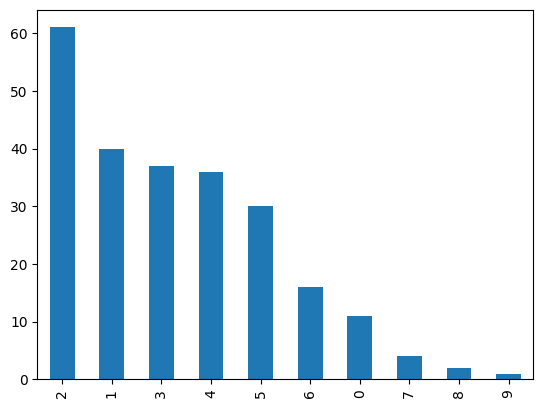

In [ ]:
new_data['skills_required'].value_counts().plot(kind= 'bar')

In [ ]:
new_data.loc[new_data['skills_required'].isin([9,8,7])]

,python,ML,NLP,DL,Other skills,Degree,GYear,candidate_score,available,skills_required
78,2,2,0,2,"Data Analytics, Deep Learning, Machine Learnin...",B.Tech,0,3,"Yes, I am available for 3 months starting imme...",7
150,2,2,0,2,"Bootstrap, C Programming, C++ Programming, CSS...",Bachelor of Computer Applications (BCA),0,3,"Yes, I am available for 3 months starting imme...",7
222,2,3,0,2,"Machine Learning, ASP.NET, C Programming, C#.N...",Bachelor of Science (B.Sc),0,3,"Yes, I am available for 3 months starting imme...",7
245,1,2,0,1,"CSS, HTML, JavaScript, Machine Learning, Artif...",Bachelor of Engineering (B.E),0,3,"Yes, I am available for 3 months starting imme...",8
471,2,2,0,1,"CSS, English Proficiency (Spoken), English Pro...",B.Tech,0,3,"Yes, I am available for 3 months starting imme...",7
526,2,1,0,1,"MS-Excel, Python, Data Analytics, Data Science...",M.Sc. Management,0,3,"Yes, I am available for 3 months starting imme...",9
731,2,2,0,1,"Algorithms, C++ Programming, Data Structures, ...",B.Tech,0,3,"Yes, I am available for 3 months starting imme...",8


**HENCE WE FINALLY GET THE TOP 7 CANDIDATES FOR THE INTERN THROUGH THIS ANALYSIS.**